In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
from pandas import Series, DataFrame
%matplotlib inline 

In [100]:
titanic_df = pd.read_csv('F:\\Libraries\\Documents\\Phyton project\\udemy\\train.csv')

In [101]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


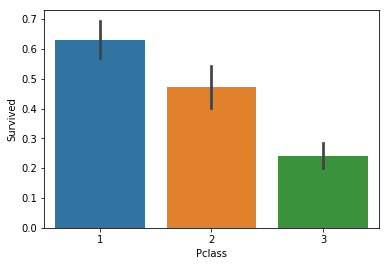

In [103]:
sbs.barplot('Pclass','Survived', data=titanic_df)

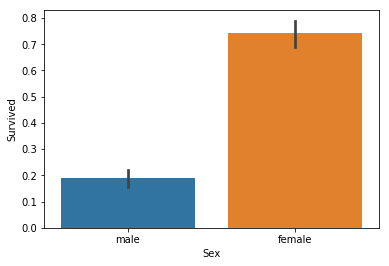

In [104]:
sbs.barplot('Sex','Survived', data=titanic_df)
#sbs.barplot('Sex', data=titanic_df)

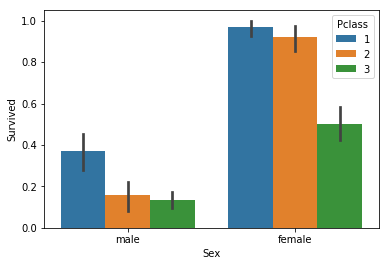

In [105]:
sbs.barplot('Sex','Survived', data=titanic_df, hue = 'Pclass')

In [106]:
#np.array('Sex")
unique, counts = np.unique(np.array(titanic_df["Sex"]), return_counts=True)
sex_tbl=dict(zip(unique, counts))
sex_tbl

{'female': 314, 'male': 577}

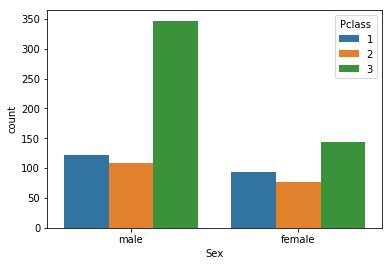

In [107]:
sbs.countplot('Sex',data=titanic_df, hue = 'Pclass')

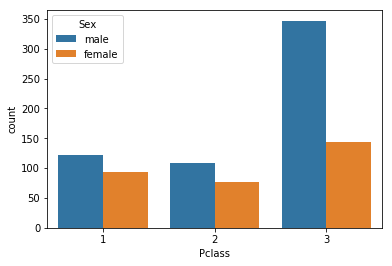

In [108]:
sbs.countplot('Pclass',data=titanic_df, hue = 'Sex')

In [109]:
#sbs.catplot("Sex",  'Pclass', data=titanic_df)

In [110]:
def man_woman_child(passenger):
    age, sex = passenger
    if age <16:
        return "child"
    else:
        return sex
    

In [111]:
titanic_df['Person']= titanic_df[["Age","Sex"]].apply(man_woman_child, axis=1)

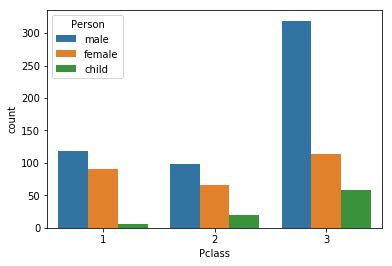

In [112]:
sbs.countplot("Pclass", data=titanic_df, hue= "Person")

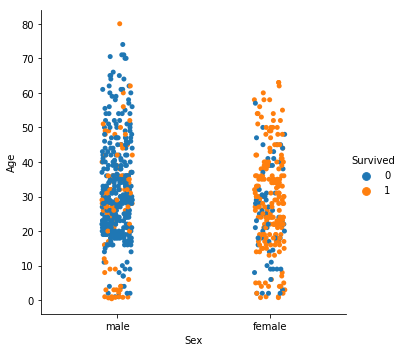

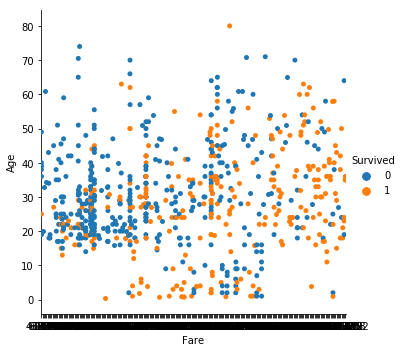

In [113]:
sbs.catplot("Sex",'Age', hue = 'Survived', data=titanic_df)
sbs.catplot("Fare",'Age', hue = 'Survived', data=titanic_df)

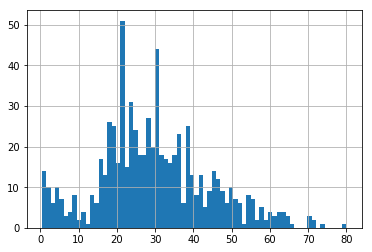

In [114]:
titanic_df["Age"].hist(bins= 70)

In [115]:
titanic_df["person"]

KeyError: 'person'

In [ ]:
#titanic_df.set_index("Sex").count("Sex")

In [ ]:
#titanic_df.count("Sex")
#a=np.array("Sex")

In [ ]:
sbs.catplot("Fare",'Age', hue = 'Sex', data=titanic_df)

In [ ]:
# idea hist by class


In [ ]:
fig = sbs.FacetGrid(titanic_df, hue= "Pclass", aspect= 4)
fig.map(sbs.kdeplot,"Age", shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim =(0,oldest))
fig.add_legend()

In [ ]:
fig = sbs.FacetGrid(titanic_df, hue= "Sex", aspect= 4)
fig.map(sbs.kdeplot,"Age", shade=True)
oldest = titanic_df["Age"].max()
fig.set(xlim =(0,oldest))
fig.add_legend()

In [ ]:
deck = titanic_df["Cabin"].dropna()

In [ ]:
deck.head()


In [ ]:
levels= [lvl[0] for lvl in deck]

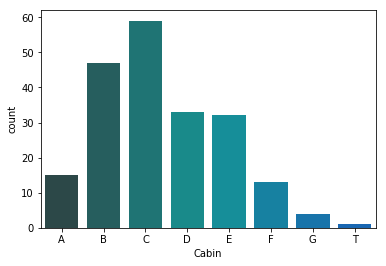

In [116]:
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ["Cabin"]
sbs.countplot("Cabin", data=cabin_df.sort_values(["Cabin"]), palette="winter_d")    # order= [A,B,C,D,E,F,G,T])
#cabin_df.head()result = df.sort(['A', 'B'],


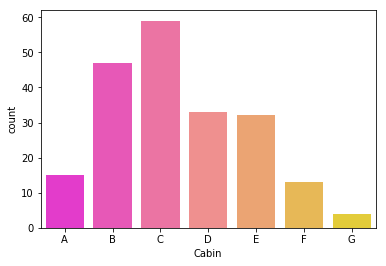

In [117]:
cabin_df2= cabin_df[cabin_df.Cabin !="T"]
#cabin_df = pd.DataFrame(levels)
#cabin_df.columns = ["Cabin"]
sbs.countplot("Cabin", data=cabin_df2.sort_values(["Cabin"]), palette="spring")      

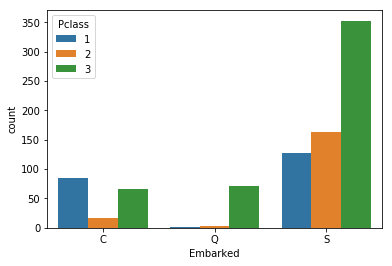

In [118]:
sbs.countplot("Embarked", data =titanic_df, hue= "Pclass", order= ["C","Q","S"] )

In [119]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [120]:
titanic_df['Alone'] =titanic_df.SibSp + titanic_df.Parch

In [121]:
titanic_df['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [122]:
titanic_df['Alone'].loc[titanic_df['Alone']>0] = "With Family"
titanic_df['Alone'].loc[titanic_df['Alone']==0] = "Alone"

C:\Users\Samix\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [123]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


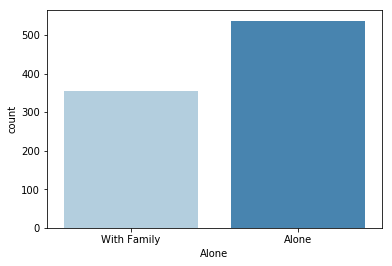

In [124]:
sbs.countplot('Alone', data= titanic_df, palette = "Blues")

In [125]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:"No" ,1:'Yes'})
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,No


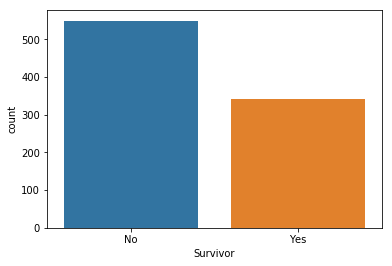

In [126]:
sbs.countplot('Survivor', data= titanic_df)

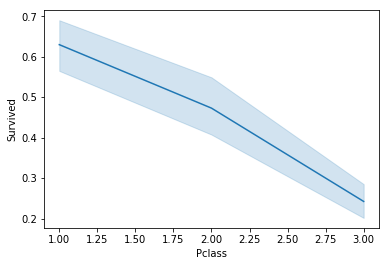

In [127]:
sbs.lineplot("Pclass", "Survived", data= titanic_df ) #, hue= "Sex")

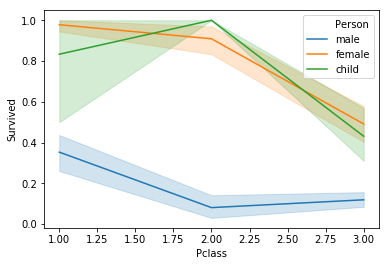

In [128]:
sbs.lineplot("Pclass", "Survived", data= titanic_df, hue= "Person" )

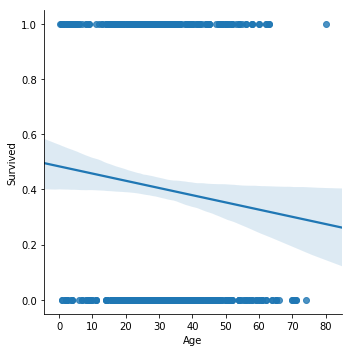

In [132]:
sbs.lmplot('Age', "Survived", data=  titanic_df )

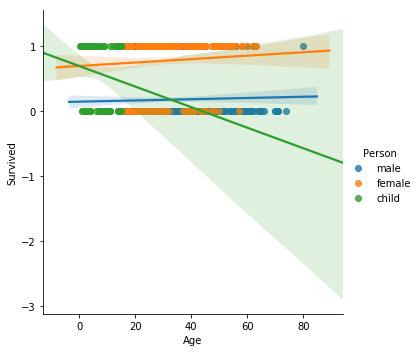

In [133]:
sbs.lmplot('Age', "Survived", data=  titanic_df , hue = 'Person')

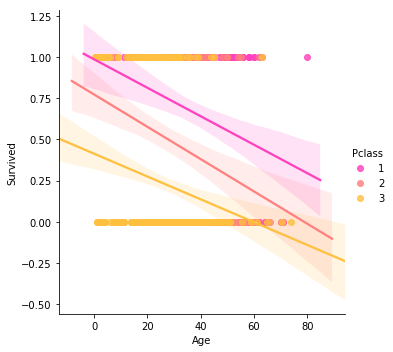

In [135]:
sbs.lmplot('Age', "Survived", data=  titanic_df, hue ='Pclass', palette= "spring")

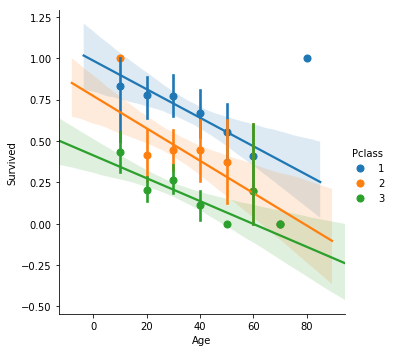

In [142]:
Generations = [10,20,30,40,50,60,70,80]
sbs.lmplot('Age', "Survived", hue= "Pclass", data= titanic_df, x_bins= Generations)

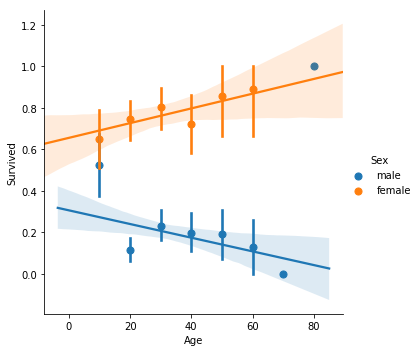

In [144]:
Generations = [10,20,30,40,50,60,70,80]
sbs.lmplot('Age', "Survived", hue= "Sex", data= titanic_df, x_bins= Generations)

In [145]:
#Generations = [10,20,30,40,50,60,70,80]
sbs.lmplot("deck", "Survived", hue= "Pclass", data= titanic_df)

KeyError: "['deck'] not in index"